# ETL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statistics as st

In [2]:
df = pd.read_csv('CarDekho.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


## Tratamiento de nulls
La cantidad de valores nules para cada columna no supera el 6% del total de ejemplos

In [3]:
# cantidad de nulos en cada columna
df_sum_nan = df.isna().sum().reset_index()
df_sum_nan.columns = ['variables', 'sum_of_nan']
df_sum_nan = df_sum_nan.query('sum_of_nan > 0')
df_sum_nan['proportion_of_nan'] = 100*df_sum_nan['sum_of_nan'] / df.shape[0]
df_sum_nan

,variables,sum_of_nan,proportion_of_nan
11,Engine,80,3.885381
12,Max Power,80,3.885381
13,Max Torque,80,3.885381
14,Drivetrain,136,6.605148
15,Length,64,3.108305
16,Width,64,3.108305
17,Height,64,3.108305
18,Seating Capacity,64,3.108305
19,Fuel Tank Capacity,113,5.488101


### Eliminandolos
Se eliminan 185 ejemplos del dataframe que corresponde a ~9% del total de ejemplos

In [4]:
df_not_null = df.dropna()
df_not_null.to_csv('datasets/CarDekho_not_null.csv', index=False)
df_not_null.head(10)


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0
10,Hyundai,Elite i20 Sportz 1.2,591000,2017,20281,Petrol,Manual,Mumbai,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0


### Rellenando con la media y la moda
- Para variables categoricas llenar los valores faltantes con la moda
    - Engine, Max Power, Max Torque, Drivetraing, Seating Capacity
- Para variables continuas llenar con la media
    - Length, Widht, Height, Fuel Tank Capacity 

In [5]:
df_fill = df.copy()

engine_mode = st.mode(df_fill['Engine'])
max_power_mode = st.mode(df_fill['Max Power'])
max_torque_mode = st.mode(df_fill['Max Torque'])
drivetrain_mode = st.mode(df_fill['Drivetrain'])
seating_capacity_mode = st.mode(df_fill['Seating Capacity'])
length_mean = np.mean(df_fill['Length'])
width_mean = np.mean(df_fill['Width'])
height_mean = np.mean(df_fill['Height'])
fuel_tank_capacity_mean = np.mean(df_fill['Fuel Tank Capacity'])

df_fill.fillna(value={
    'Engine': engine_mode,
    'Max Power': max_power_mode,
    'Max Torque': max_torque_mode,
    'Drivetrain': drivetrain_mode,
    'Seating Capacity': seating_capacity_mode,
    'Length': length_mean,
    'Width': width_mean,
    'Height': height_mean,
    'Fuel Tank Capacity': fuel_tank_capacity_mean
}, inplace=True)
df_fill.to_csv('datasets/CarDekho_filled.csv', index=False)


## Manejo de variabels categoricas

## Normalizacion
En el grafico de caja se puede ver que la escala de Price es mayor a todas las demas variables.

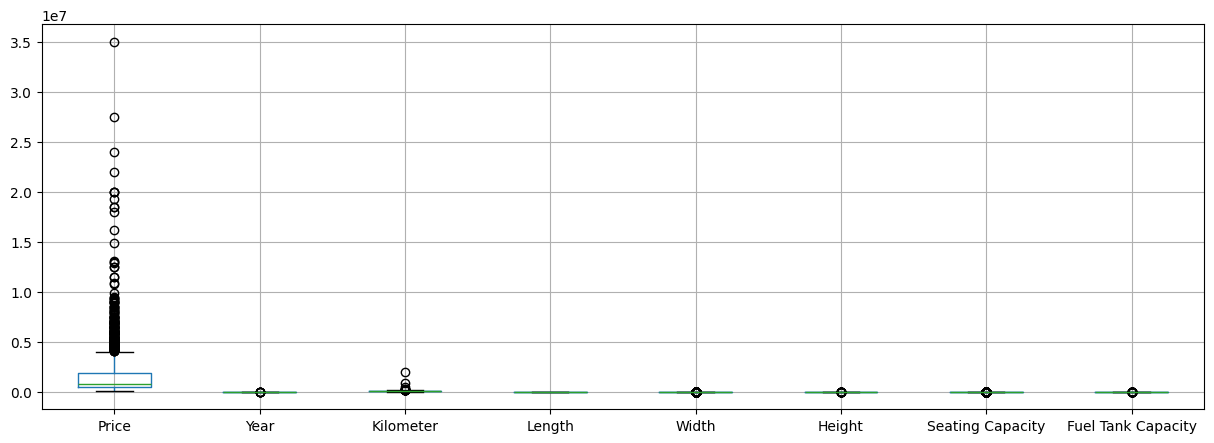

In [20]:
df.boxplot(figsize=(15,5))
plt.show()